In [1]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from matplotlib import pyplot

In [3]:
X, y = make_classification(n_samples=1000,n_features=4, n_classes=2, random_state=1) # X = Data and y = lables

In [4]:
X.shape

(1000, 4)

In [5]:
X

array([[ 1.91518414,  1.14995454, -1.52847073,  0.79430654],
       [ 1.4685668 ,  0.80644722, -1.04912964,  0.74652026],
       [ 1.47102089,  0.90060386, -1.20228498,  0.57845433],
       ...,
       [-2.14648492, -0.24693238,  0.01337634, -2.79100527],
       [-2.62889557, -1.18505478,  1.45623708, -1.80807547],
       [ 0.50047097,  0.81763526, -1.24302955, -0.73584899]])

In [6]:
y.shape

(1000,)

In [7]:
y

array([1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,

In [8]:
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.3, random_state=1)

In [9]:
trainX.shape

(700, 4)

In [10]:
testX.shape

(300, 4)

In [11]:
trainy.shape

(700,)

In [12]:
testy.shape

(300,)

In [13]:
model = KNeighborsClassifier(n_neighbors=3)

In [14]:
model.fit(trainX, trainy) #train

KNeighborsClassifier(n_neighbors=3)

In [18]:
P = model.predict_proba(testX) #test

In [26]:
P.shape #columns two = answer

(300, 2)

In [17]:
auc = roc_auc_score(testy, P[:,1])

In [19]:
auc

0.8768235189468065

In [21]:
fpr, tpr, thresholds = roc_curve(testy, P[:, 1])

In [22]:
fpr

array([0.        , 0.09090909, 0.18831169, 0.38961039, 1.        ])

In [23]:
tpr

array([0.        , 0.65753425, 0.8630137 , 0.93835616, 1.        ])

In [27]:
thresholds

array([2.        , 1.        , 0.66666667, 0.33333333, 0.        ])

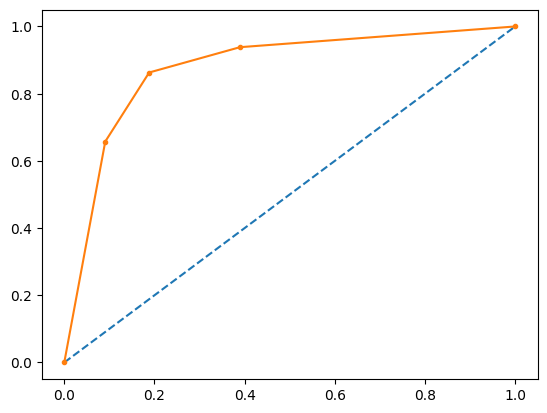

In [28]:
pyplot.plot([0, 1], [0, 1], linestyle='--')
pyplot.plot(fpr, tpr, marker='.')